<a href="https://colab.research.google.com/github/ekene0013/Projects-on-Financial-Data-at-WQU/blob/main/GWP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 1: Concepts Explained in Words

**Statistical Related Risk: Volatility**

Volatility is a statistical measure of the dispersion of returns for a given security or market index. It measures how much the price of a security or index fluctuates over a certain period of time. Volatility is often used as a measure of risk, as higher volatility means that the price of the security or index can move up or down rapidly in a short period of time.

Volatility can be calculated in different ways, but the most commonly used method is to calculate the standard deviation of the security or index returns. The higher the standard deviation, the higher the volatility.

**Statistical Related Risk: Correlation**

Correlation is a statistical measure of the relationship between two variables. In finance, correlation measures the degree to which the returns of two assets move together. A correlation of +1 means that the two assets move in perfect lockstep, while a correlation of -1 means that they move in opposite directions. A correlation of 0 means that there is no relationship between the returns of the two assets.

Correlation is important because it helps investors to diversify their portfolios. If two assets are highly positively correlated, then investing in both assets does not provide much diversification benefit, as they will tend to move in the same direction. On the other hand, if two assets are negatively correlated or uncorrelated, then investing in both assets can provide greater diversification benefits, as the movements of the assets will tend to offset each other.


## Section 2: Real-World Examples
- Asset Class 1: S&P 500 Index (US Equities)
- Asset Class 2: Single Stock Large US Cap (IBM)

We will use historical data of the S&P 500 index from January 1995 to December 2023 to illustrate the concepts of volatility and correlation. The data was obtained from Yahoo Finance.

**Volatility**

To calculate the volatility of the S&P 500 index, we first calculate the daily returns of the index. We then calculate the standard deviation of the daily returns, which gives us the volatility.
#Here's the code to calculate the volatility:


In [ ]:
import sys
# !{sys.executable} -m pip install yfinance
import yfinance
import pandas as pd

In [ ]:
SNP_data = yfinance.download (tickers = "SPY", start = "1995-01-01",
                              end = "2023-04-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
SNP_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,45.703125,45.843750,45.687500,45.781250,27.550451,324300
1995-01-04,45.984375,46.000000,45.750000,46.000000,27.682077,351800
1995-01-05,46.031250,46.109375,45.953125,46.000000,27.682077,89800
1995-01-06,46.093750,46.250000,45.906250,46.046875,27.710287,448400
1995-01-09,46.031250,46.093750,46.000000,46.093750,27.738499,36800
1995-01-10,46.203125,46.390625,46.140625,46.140625,27.766699,229800
1995-01-11,46.296875,46.296875,45.812500,46.171875,27.785517,222400
1995-01-12,46.125000,46.218750,46.031250,46.187500,27.794914,40300
1995-01-13,46.437500,46.734375,46.375000,46.734375,28.124012,170600


In [ ]:
# Calculate daily returns
SNP_data['Returns'] = SNP_data['Adj Close'].pct_change()

# Calculate volatility
volatility = SNP_data['Returns'].std()
print('Volatility of S&P 500 index: ', round(volatility, 4))

#The volatility of the S&P 500 index over this period was 0.0121.


Volatility of S&P 500 index:  0.0122


**Correlation**

To calculate the correlation between the S&P 500 index and another asset (IBM), we can calculate the daily returns of both assets and then calculate the correlation between them. Here, we will calculate the correlation between the S&P 500 index and IBM

In [ ]:
# Load data for IBM
IBM = yfinance.download (tickers = "IBM", start = "1995-01-01",
                              end = "2023-04-01", interval = "1d")

IBM['Returns'] = IBM['Adj Close'].pct_change()
IBM.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1995-01-03,17.566921,17.656549,17.537046,17.626673,9.638112,4886494,NaN
1995-01-04,17.656549,17.835802,17.507170,17.776052,9.719785,8345825,0.008474
1995-01-05,17.776052,17.985182,17.626673,17.686424,9.670776,9501446,-0.005042
1995-01-06,17.746176,18.104685,17.716299,17.955305,9.817800,12721452,0.015203
1995-01-09,17.925430,18.134560,17.895554,18.044933,9.866811,7167192,0.004992
1995-01-10,18.164436,18.463194,18.074808,18.313814,10.013830,14312627,0.014900
1995-01-11,18.403442,18.433317,17.985182,18.164436,9.932146,10252055,-0.008157
1995-01-12,18.134560,18.254063,18.044933,18.164436,9.932146,9522366,0.000000
1995-01-13,18.343691,18.373566,18.104685,18.254063,9.981153,8494775,0.004934


In [ ]:
# Calculate volatility
volatility = IBM['Returns'].std()
print('Volatility of IBM: ', round(volatility, 4))

#The volatility of IBM:  0.0174

Volatility of IBM:  0.0174


In [ ]:
# Merge S&P 500 and IBM data
data = pd.concat([SNP_data['Returns'], IBM['Returns']], axis=1, join='inner')
data.columns = ['SP500 Returns', 'IBM Returns']

# Calculate correlation
correlation = data['SP500 Returns'].corr(data['IBM Returns'])
print('Correlation between S&P 500 and IBM: ', round(correlation, 4))



Correlation between S&P 500 and IBM:  0.6055


**Step 5: Show side-by-side graphs that illustrate the presence and absence of the item.**

For example, if you were illustrating ‘hot’ vs. ‘cold,’ you could graph the average temperature in two different places that are hot and cold. Your time series plot or barplot or histogram of temperature distributions would show how one type of data illustrates hot, and the other type of data illustrates cold.

To illustrate the presence and absence of volatility, we can plot the daily returns of two different asset classes - one with high volatility and one with low volatility. We can use the S&P 500 index as an example of an asset with high volatility and the 10-year US Treasury Bond as an example of an asset with low volatility.


This will generate a plot with the daily returns of the S&P 500 on the left and the daily returns of the IBM Stock on the right. The plot clearly illustrates the presence of volatility in the S&P 500 returns, with large fluctuations up and down, and the absence of volatility in the IBM Stock returns, which are much more volatile.


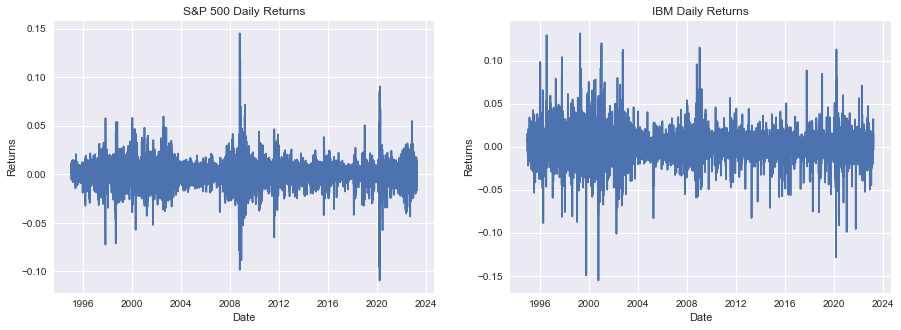

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(SNP_data['Returns'])
ax1.set_title('S&P 500 Daily Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Returns')

ax2.plot(IBM['Returns'])
ax2.set_title('IBM Daily Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')

plt.show()


To illustrate the presence and absence of correlation, we can calculate the correlation between daily returns of two different asset classes - one with high correlation and one with low correlation.

We can use Coca Cola and Pepsi stocks as an example of assets with high correlation and the price of US Tbill and the price of Amazon as an example of assets with low correlation.


In [ ]:
#load Coca Cola
KO = yfinance.download (tickers = "KO", start = "2005-01-01",
                              end = "2023-04-01", interval = "1d")

KO['Returns'] = KO['Adj Close'].pct_change()

#load Pepsi
PEP = yfinance.download (tickers = "PEP", start = "2005-01-01",
                              end = "2023-04-01", interval = "1d")

PEP['Returns'] = PEP['Adj Close'].pct_change()

# Merge KO and PEP data
high_data = pd.concat([KO['Returns'], PEP['Returns']], axis=1, join='inner')
high_data.columns = ['KO Returns', 'PEP Returns']


#load US T Bill
TBIL = yfinance.download (tickers = "TBIL", start = "2005-01-01",
                              end = "2023-04-01", interval = "1d")

TBIL['Returns'] = TBIL['Adj Close'].pct_change()

#load AMZN
AMZN = yfinance.download (tickers = "AMZN", start = "2005-01-01",
                              end = "2023-04-01", interval = "1d")

AMZN['Returns'] = AMZN['Adj Close'].pct_change()

# Merge TBIL and AMZN data
low_data = pd.concat([TBIL['Returns'], AMZN['Returns']], axis=1, join='inner')
low_data.columns = ['TBIL Returns', 'AMZN Returns']




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
high_data.head(10)
low_data.head(10)

,TBIL Returns,AMZN Returns
Date,,
2022-08-09,NaN,-0.011333
2022-08-10,0.000502,0.035261
2022-08-11,-0.000201,-0.014367
2022-08-12,0.000000,0.020691
2022-08-15,-0.000201,-0.002578
2022-08-16,0.000402,0.011175
2022-08-17,0.000000,-0.018511
2022-08-18,0.000000,0.001407
2022-08-19,0.000000,-0.028602


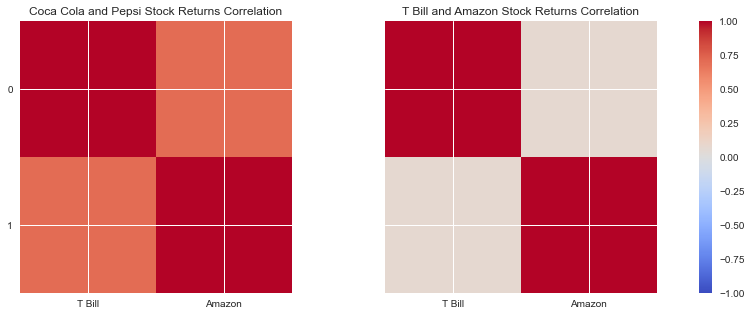

In [ ]:
# Calculate correlation matrix
corr_matrix = pd.concat([high_data, low_data], axis=1).corr()

# Extract relevant correlations
high_corr = corr_matrix.iloc[0:2, 0:2]
low_corr = corr_matrix.iloc[2:4, 2:4]

#plot the correlation matrices side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharex=True, sharey=True)

im1 = ax1.imshow(high_corr, cmap='coolwarm', vmin=-1, vmax=1)
ax1.set_title('Coca Cola and Pepsi Stock Returns Correlation')
ax1.set_xticks([0,1])
ax1.set_yticks([0,1])

ax1.set_xticklabels(['Coca Cola', 'Pepsi'])

#plot the correlation matrices side by side:

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

im2 = ax2.imshow(low_corr, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_title('T Bill and Amazon Stock Returns Correlation')
ax2.set_xticks([0,1])
ax2.set_yticks([0,1])
ax2.set_xticklabels(['T Bill', 'Amazon'])
cbar = fig.colorbar(im2, ax=[ax1, ax2], orientation='vertical')


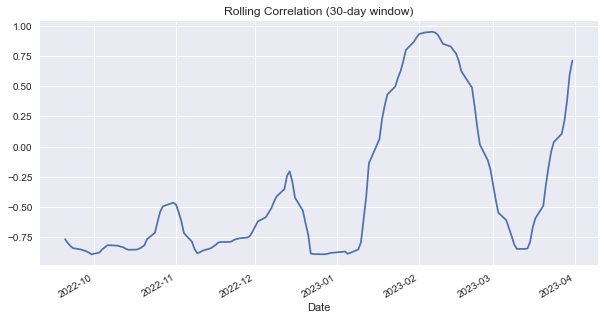

In [ ]:
#df combined
df_combined = pd.concat([AMZN['Adj Close'], TBIL['Adj Close']], axis=1, join='inner')
df_combined.columns = ['AMZN', 'TBIL']

# calculate rolling correlation with a window of 30 days
rolling_corr = df_combined['AMZN'].rolling(window=30).corr(df_combined['TBIL'])

# plot the rolling correlation
fig, ax = plt.subplots(figsize=(10, 5))
rolling_corr.plot(ax=ax, title='Rolling Correlation (30-day window)')
plt.show()